In [29]:
#pip install -U pandas-profiling
#Foi necessário instalar -> pip install ipywidgets

In [241]:
# Instlação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

In [13]:
# Configurações necessárias para o Pandas Profile
from pandas_profiling import ProfileReport
profile = ProfileReport(df_seguro, title="Relatório Plano de Saúde", html={'style':{'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file='Relatório Plano de Saúde.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [283]:
# Fazendo a leitura do dataset com o pandas
df_seguro = pd.read_csv('insurance.csv')

In [14]:
df_seguro.shape

(1338, 7)

In [4]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# tipagem dos dados
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_seguro.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# Visualzando as colunas
df_seguro.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Pandas

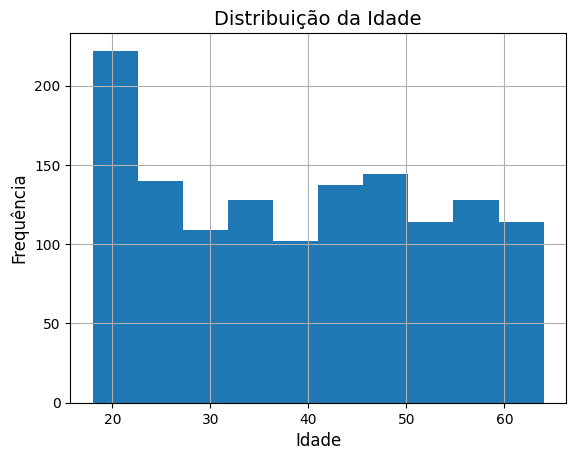

In [8]:
# Nesse gráfico visualisamos a quantidade de pessoas que contratam o seguro de acordo com a idade
ax_hist = df_seguro['age'].plot(kind = 'hist',
                    grid = 1,
                    legend = None)

ax_hist.set_xlabel("Idade", fontsize = 12, rotation = 0)
ax_hist.set_ylabel("Frequência", fontsize = 12)
ax_hist.set_title("Distribuição da Idade", fontsize = 14, rotation = 0)

ax_hist = ax_hist

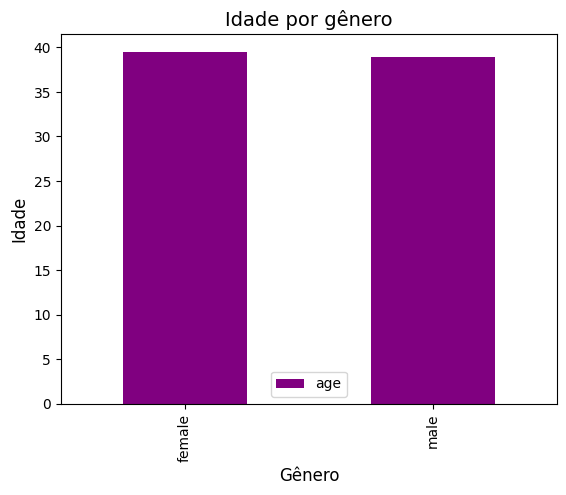

In [10]:
# Aqui visualizamos uma média da faixa etária de pessoas que contratam o seguro de acordo com o sexo
sex_age = df_seguro.pivot_table(index='sex', values='age', aggfunc='mean')
ax_sex_age = sex_age.plot(kind='bar', color='purple')

ax_sex_age.set_xlabel("Gênero", fontsize = 12, rotation = 0)
ax_sex_age.set_ylabel("Idade", fontsize = 12)
ax_sex_age.set_title("Idade por gênero", fontsize = 14, rotation = 0)

ax_sex_age = ax_sex_age



#### Matplotlib

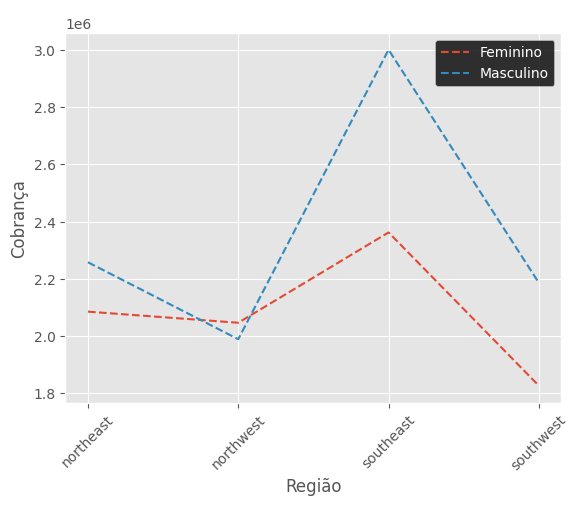

In [313]:
# Mostrando a tendência de cobranças por região para cada sexo
plt_seguro = df_seguro.pivot_table(index='region', columns='sex', values='charges', aggfunc='sum')
plt.plot(plt_seguro , "--" ,label=['Feminino','Masculino'],)
plt.title('Cobranças por Região')
plt.style.use('ggplot')
plt.xlabel('Região')
plt.ylabel('Cobrança')
plt.xticks(rotation=45)
plt.legend(facecolor='black')
plt_seguro = plt_seguro

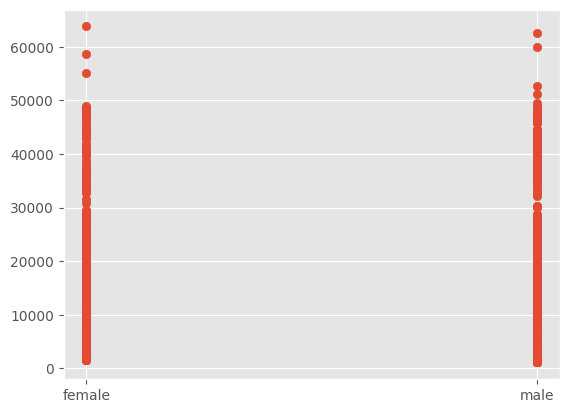

In [315]:
# A dispersão dos dados não está bem representada aqui
plt.scatter(data=df_seguro, x='sex', y='charges')

In [359]:
smokers = df_seguro.groupby('smoker')['region'].value_counts()
smokers

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
Name: region, dtype: int64